**Riddhi Tanna**

**201801427**

# Importing required libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd 
import sklearn as sk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
#reading the dataset
df = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [3]:
df_vals = df.drop(['5'], axis =1)

In [4]:
df = df.astype(float)
df.info()
from sklearn.preprocessing import StandardScaler
features = df.columns[1:]
# Separating out the features
train = df.loc[:, features].values 
# Standardizing the features
train = StandardScaler().fit_transform(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 5 to 0.617
dtypes: float64(785)
memory usage: 359.3 MB


# Performing PCA on the train dataset

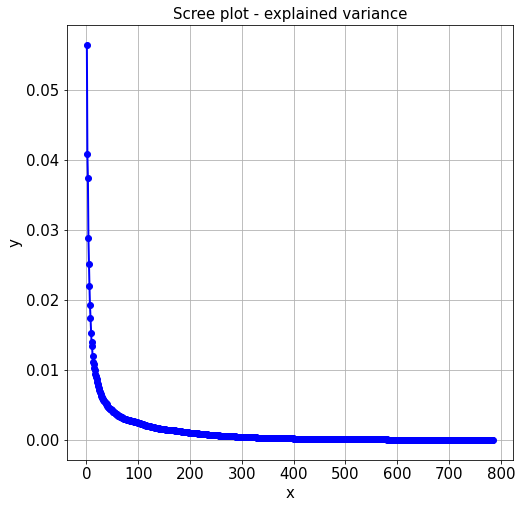

In [10]:
pca = PCA(n_components=784)
principal_components = pca.fit_transform(train)
principal_df = pd.DataFrame(data = principal_components)

fig, ax = plt.subplots(figsize=[8,8])

plt.plot(np.arange(1,785),pca.explained_variance_ratio_,'b-o', lw=2)
plt.grid()
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Scree plot - explained variance', fontsize = 15)

# explained variance = 95%
pca95 = PCA(.95)
pca95.fit(train)
pc95_scores = pca95.transform(train)
pc95_weights = pca95.components_

# explained variance = 90%
pca90 = PCA(.90)
pca90.fit(train)
pc90_scores = pca90.transform(train)
pc90_weights = pca90.components_

# explained variance = 80%
pca80 = PCA(.80)
pca80.fit(train)
pc80_scores = pca80.transform(train)
pc80_weights = pca80.components_

# explained variance = 75%
pca75 = PCA(.75)
pca75.fit(train)
pc75_scores = pca75.transform(train)
pc75_weights = pca75.components_

In [6]:
print('Number of PCs for 95% variance: {}'.format(pca95.n_components_))
print('Number of PCs for 90% variance: {}'.format(pca90.n_components_))
print('Number of PCs for 80% variance: {}'.format(pca80.n_components_))
print('Number of PCs for 75% variance: {}'.format(pca75.n_components_))


weights_array = [pc95_weights.T, pc90_weights.T, pc80_weights.T , pc75_weights.T]
scores_array = [pc95_scores, pc90_scores, pc80_scores , pc75_scores]
print(np.shape(scores_array[1][2:3] @ weights_array[1].T))
print('Shape of weights for 95% : {}'.format(np.shape(weights_array[0])))
print('Shape of scores for 95%: {}'.format(np.shape(scores_array[0])))

Number of PCs for 95% variance: 331
Number of PCs for 90% variance: 236
Number of PCs for 80% variance: 149
Number of PCs for 75% variance: 120
(1, 784)
Shape of weights for 95% : (784, 331)
Shape of scores for 95%: (59999, 331)


We know, S = XW, where S is the scores, X is the data and W are the weights. Hence, to reconstruct any data, we will use the following:

X = S.W^T

# Reconstructing test images 

In [7]:
zeroes = np.array(df_test[df_test['7'] == 0].drop(['7'], axis=1))
ones = np.array(df_test[df_test['7'] == 1].drop(['7'], axis=1))
twos = np.array(df_test[df_test['7'] == 2].drop(['7'], axis=1))
threes = np.array(df_test[df_test['7'] == 3].drop(['7'], axis=1))
fours = np.array(df_test[df_test['7'] == 4].drop(['7'], axis=1))
fives = np.array(df_test[df_test['7'] == 5].drop(['7'], axis=1))
sixes = np.array(df_test[df_test['7'] == 6].drop(['7'], axis=1))
sevens = np.array(df_test[df_test['7'] == 7].drop(['7'], axis=1))
eights = np.array(df_test[df_test['7'] == 8].drop(['7'], axis=1))
nines = np.array(df_test[df_test['7'] == 9].drop(['7'], axis=1))

In [8]:
zeroes_scores = []
for i in range(4):
    zeroes_scores.append(StandardScaler().fit_transform(zeroes) @ weights_array[i])

ones_scores = []
for i in range(4):
    ones_scores.append(StandardScaler().fit_transform(ones) @ weights_array[i])

twos_scores = []
for i in range(4):
    twos_scores.append(StandardScaler().fit_transform(twos) @ weights_array[i])

threes_scores = []
for i in range(4):
    threes_scores.append(StandardScaler().fit_transform(threes) @ weights_array[i])

fours_scores = []
for i in range(4):
    fours_scores.append(StandardScaler().fit_transform(fours) @ weights_array[i])

fives_scores = []
for i in range(4):
    fives_scores.append(StandardScaler().fit_transform(fives) @ weights_array[i])

sixes_scores = []
for i in range(4):
    sixes_scores.append(StandardScaler().fit_transform(sixes) @ weights_array[i])

sevens_scores = []
for i in range(4):
    sevens_scores.append(StandardScaler().fit_transform(sevens) @ weights_array[i])

eights_scores = []
for i in range(4):
    eights_scores.append(StandardScaler().fit_transform(eights) @ weights_array[i])

nines_scores = []
for i in range(4):
    nines_scores.append(StandardScaler().fit_transform(nines) @ weights_array[i])

/Users/riddhi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
zer = pca95.inverse_transform(zeroes_scores[0])

zeroes_r = []

zeroes_r.append(pca95.inverse_transform(zeroes_scores[0]))
zeroes_r.append(pca90.inverse_transform(zeroes_scores[1]))
zeroes_r.append(pca80.inverse_transform(zeroes_scores[2]))
zeroes_r.append(pca75.inverse_transform(zeroes_scores[3]))
    

ones_r = []

ones_r.append(pca95.inverse_transform(ones_scores[0]))
ones_r.append(pca90.inverse_transform(ones_scores[1]))
ones_r.append(pca80.inverse_transform(ones_scores[2]))
ones_r.append(pca75.inverse_transform(ones_scores[3]))

twos_r = []
twos_r.append(pca95.inverse_transform(twos_scores[0]))
twos_r.append(pca90.inverse_transform(twos_scores[1]))
twos_r.append(pca80.inverse_transform(twos_scores[2]))
twos_r.append(pca75.inverse_transform(twos_scores[3]))
    
threes_r = []
threes_r.append(pca95.inverse_transform(threes_scores[0]))
threes_r.append(pca90.inverse_transform(threes_scores[1]))
threes_r.append(pca80.inverse_transform(threes_scores[2]))
threes_r.append(pca75.inverse_transform(threes_scores[3]))

fours_r = []
fours_r.append(pca95.inverse_transform(fours_scores[0]))
fours_r.append(pca90.inverse_transform(fours_scores[1]))
fours_r.append(pca80.inverse_transform(fours_scores[2]))
fours_r.append(pca75.inverse_transform(fours_scores[3]))
    
fives_r = []
fives_r.append(pca95.inverse_transform(fives_scores[0]))
fives_r.append(pca90.inverse_transform(fives_scores[1]))
fives_r.append(pca80.inverse_transform(fives_scores[2]))
fives_r.append(pca75.inverse_transform(fives_scores[3]))

sixes_r = []
sixes_r.append(pca95.inverse_transform(sixes_scores[0]))
sixes_r.append(pca90.inverse_transform(sixes_scores[1]))
sixes_r.append(pca80.inverse_transform(sixes_scores[2]))
sixes_r.append(pca75.inverse_transform(sixes_scores[3]))

sevens_r = []
sevens_r.append(pca95.inverse_transform(sevens_scores[0]))
sevens_r.append(pca90.inverse_transform(sevens_scores[1]))
sevens_r.append(pca80.inverse_transform(sevens_scores[2]))
sevens_r.append(pca75.inverse_transform(sevens_scores[3]))

eights_r = []
eights_r.append(pca95.inverse_transform(eights_scores[0]))
eights_r.append(pca90.inverse_transform(eights_scores[1]))
eights_r.append(pca80.inverse_transform(eights_scores[2]))
eights_r.append(pca75.inverse_transform(eights_scores[3]))

nines_r = []
nines_r.append(pca95.inverse_transform(nines_scores[0]))
nines_r.append(pca90.inverse_transform(nines_scores[1]))
nines_r.append(pca80.inverse_transform(nines_scores[2]))
nines_r.append(pca75.inverse_transform(nines_scores[3]))

# Plotting the reconstructed images along with the original image

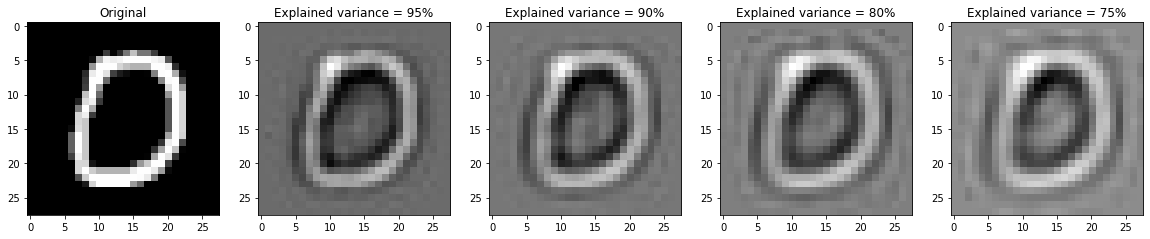

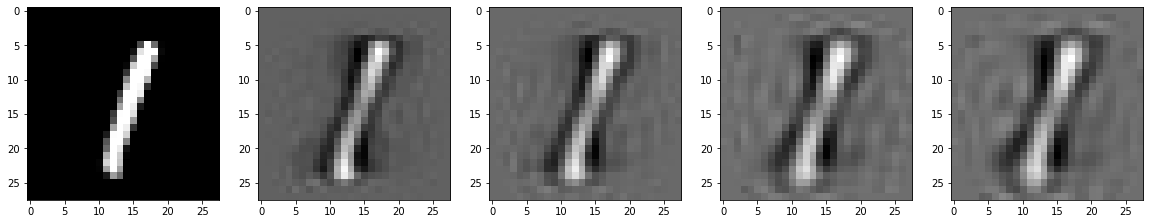

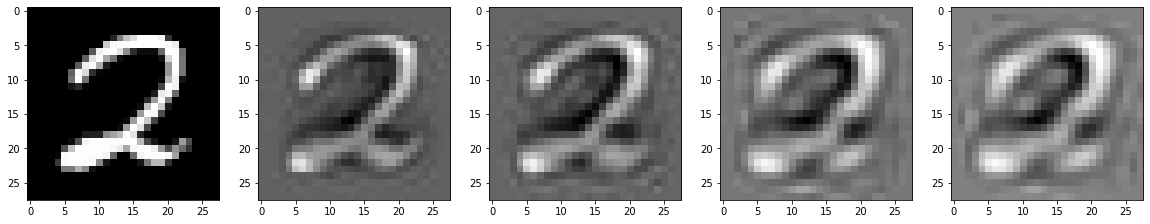

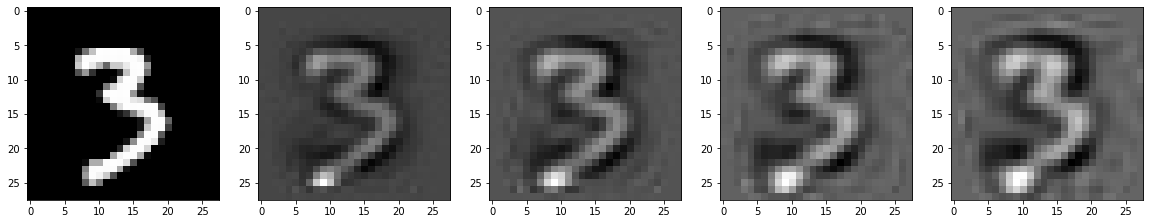

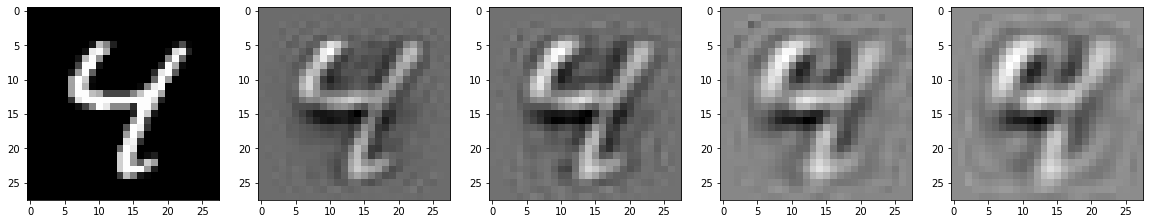

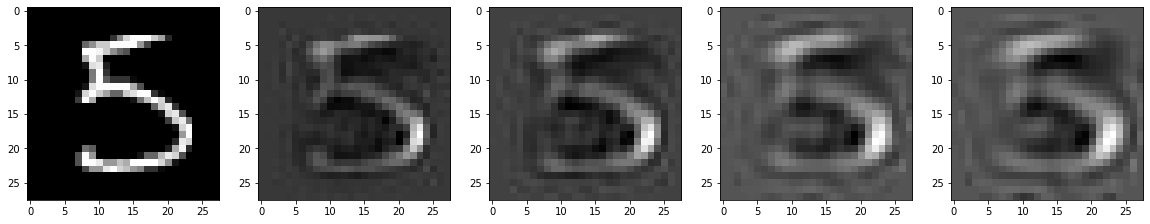

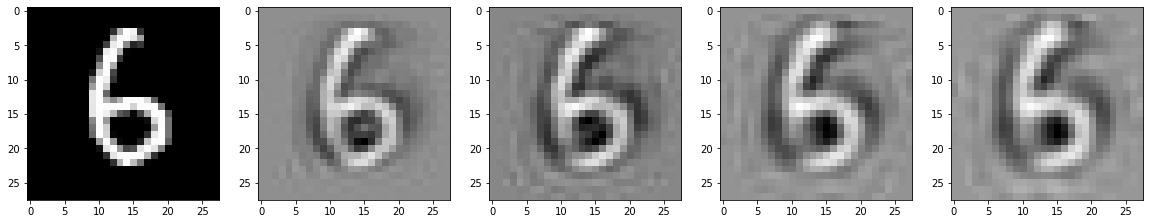

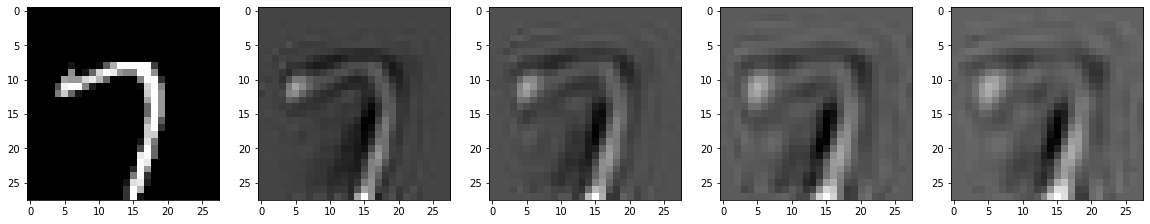

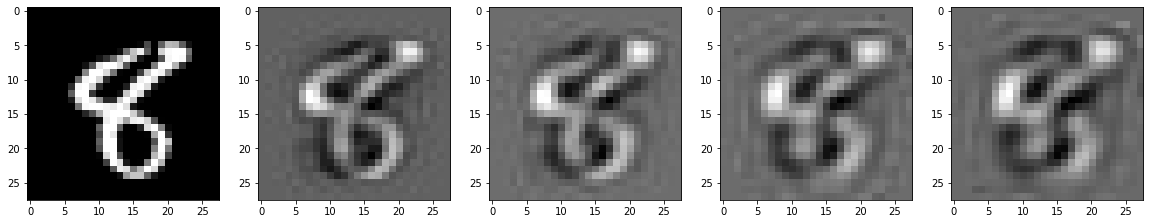

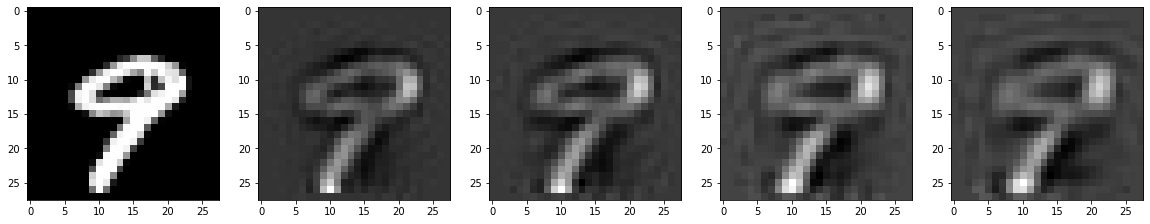

In [10]:
variance = [95,90,80,75] 

#ZERO
fig , ax = plt.subplots(figsize=[20,10])

plt.subplot(1, 5, 1)
plt.title('Original')
plt.imshow(np.array(zeroes[1:2]).reshape(28,28), interpolation = 'none', cmap = 'gray')

for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.title('Explained variance = {}%'.format(variance[i]))
    plt.imshow((zeroes_r[i][1:2]).reshape(28,28), interpolation = "none", cmap = "gray")
plt.show()

#ONE
fig , ax = plt.subplots(figsize=[20,10])

plt.subplot(1, 5, 1)
plt.imshow(np.array(ones[1:2]).reshape(28,28), interpolation = 'none', cmap = 'gray')

for i in range(4):
    plt.subplot(1, 5, i+2)
    
    plt.imshow((ones_r[i][1:2]).reshape(28,28), interpolation = "none", cmap = "gray")
plt.show()

plt.show()

#TWO
fig , ax = plt.subplots(figsize=[20,10])

plt.subplot(1, 5, 1)
plt.imshow(np.array(twos[1:2]).reshape(28,28), interpolation = 'none', cmap = 'gray')

for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.imshow((twos_r[i][1:2]).reshape(28,28), interpolation = "none", cmap = "gray")
plt.show()

#THREE
fig , ax = plt.subplots(figsize=[20,10])

plt.subplot(1, 5, 1)
plt.imshow(np.array(threes[1:2]).reshape(28,28), interpolation = 'none', cmap = 'gray')

for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.imshow((threes_r[i][1:2]).reshape(28,28), interpolation = "none", cmap = "gray")
plt.show()


#FOUR
fig , ax = plt.subplots(figsize=[20,10])

plt.subplot(1, 5, 1)
plt.imshow(np.array(fours[1:2]).reshape(28,28), interpolation = 'none', cmap = 'gray')

for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.imshow((fours_r[i][1:2]).reshape(28,28), interpolation = "none", cmap = "gray")
plt.show()

#FIVE
fig , ax = plt.subplots(figsize=[20,10])

plt.subplot(1, 5, 1)
plt.imshow(np.array(fives[1:2]).reshape(28,28), interpolation = 'none', cmap = 'gray')

for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.imshow((fives_r[i][1:2]).reshape(28,28), interpolation = "none", cmap = "gray")
plt.show()

#SIX
fig , ax = plt.subplots(figsize=[20,10])

plt.subplot(1, 5, 1)
plt.imshow(np.array(sixes[1:2]).reshape(28,28), interpolation = 'none', cmap = 'gray')

for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.imshow((sixes_r[i][1:2]).reshape(28,28), interpolation = "none", cmap = "gray")
plt.show()

#SEVEN
fig , ax = plt.subplots(figsize=[20,10])

plt.subplot(1, 5, 1)
plt.imshow(np.array(sevens[1:2]).reshape(28,28), interpolation = 'none', cmap = 'gray')

for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.imshow((sevens_r[i][1:2]).reshape(28,28), interpolation = "none", cmap = "gray")
plt.show()

#EIGHT
fig , ax = plt.subplots(figsize=[20,10])

plt.subplot(1, 5, 1)
plt.imshow(np.array(eights[1:2]).reshape(28,28), interpolation = 'none', cmap = 'gray')

for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.imshow((eights_r[i][1:2]).reshape(28,28), interpolation = "none", cmap = "gray")
plt.show()

#NINE
fig , ax = plt.subplots(figsize=[20,10])

plt.subplot(1, 5, 1)
plt.imshow(np.array(nines[1:2]).reshape(28,28), interpolation = 'none', cmap = 'gray')

for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.imshow((nines_r[i][1:2]).reshape(28,28), interpolation = "none", cmap = "gray")
plt.show()


In [11]:
# calculating rmse 
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_0 = []
rmse_1 = []
rmse_2 = []
rmse_3 = []
rmse_4 = []
rmse_5 = []
rmse_6 = []
rmse_7 = []
rmse_8 = []
rmse_9 = []


for i in range(4):
    s0 = ((np.array(zeroes[1:2]) - zeroes_r[i][1:2])**2).mean()
    s0 = sqrt(s0)
    rmse_0.append(s0)
    
    s1 = ((np.array(ones[1:2]) - ones_r[i][1:2])**2).mean()
    s1 = sqrt(s1)
    rmse_1.append(s1)
    
    s2 = ((np.array(twos[1:2]) - twos_r[i][1:2])**2).mean()
    s2 = sqrt(s2)
    rmse_2.append(s2)
    
    s3 = ((np.array(threes[1:2]) - threes_r[i][1:2])**2).mean()
    s3 = sqrt(s3)
    rmse_3.append(s3)
    
    s4 = ((np.array(fours[1:2]) - fours_r[i][1:2])**2).mean()
    s4 = sqrt(s4)
    rmse_4.append(s4)
    
    s5 = ((np.array(fives[1:2]) - fives_r[i][1:2])**2).mean()
    s5 = sqrt(s5)
    rmse_5.append(s5)
    
    s6 = ((np.array(sixes[1:2]) - sixes_r[i][1:2])**2).mean()
    s6 = sqrt(s6)
    rmse_6.append(s6)
    
    s7 = ((np.array(sevens[1:2]) - sevens_r[i][1:2])**2).mean()
    s7 = sqrt(s7)
    rmse_7.append(s7)
    
    s8 = ((np.array(eights[1:2]) - eights_r[i][1:2])**2).mean()
    s8 = sqrt(s8)
    rmse_8.append(s8)
    
    s9 = ((np.array(nines[1:2]) - nines_r[i][1:2])**2).mean()
    s9 = sqrt(s9)
    rmse_9.append(s9)

In [12]:
df_rmse = pd.DataFrame([rmse_0, rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_6, rmse_7, rmse_8, rmse_9], columns=['95%','90%','80%','75%'])

In [13]:
df_rmse

,95%,90%,80%,75%
0,89.733254,89.754097,89.774559,89.785759
1,61.895642,61.905274,61.922819,61.929079
2,88.717891,88.748300,88.807625,88.820994
3,83.320120,83.332281,83.359066,83.371391
4,74.444416,74.471198,74.526635,74.548468
5,74.385725,74.443611,74.516997,74.547605
6,77.511429,77.538638,77.572832,77.585161
7,62.509477,62.544135,62.597488,62.616687
8,86.454097,86.489826,86.544806,86.568192
9,93.305434,93.319364,93.346286,93.366121


We can see that as we take higher number of components for PCA, the explained variance increases and hence, the error in reconstruction is lower. 